<hr style="border-width:4px; border-color:coral"/>

## Multiprocessing in Python

<hr style="border-width:4px; border-color:coral"/>


The Multiprocessing (MP) module can be used to launch OS processes and direct each process to carry out tasks.  The MP module is available as part of the standard Python package and can be imported directly without any additional installation. 

In [1]:
import multiprocessing as mp
mp.set_start_method('fork')

#### How many cores? 

A very basic task is to use multiprocessing to how many CPU cores we have access to. 

*In what follows, we will refer to the multiprocessing package using `mp`.*

In [2]:
nprocs = mp.cpu_count()
print(f"Number of processors available : {nprocs}")

Number of processors available : 12


### Launching a Process
<hr style="border-width:4px; border-color:black"></hr>

We can launch an operating system process with the following steps: 

* Create an *instance* of a class `mp.Process`, 

     * We pass a *target* argument to indicate what we want the process to do.   In Python, this "target" is a Python function.
     
           def task():
               # do something
               pass
                    
           job = mp.Process(target=task)


* Start the process using the class method `mp.Process.start()`

      job.start()

* To wait for the job to complete using the method `mp.Process.join()`

      job.join()
           

In [3]:
# Create an instance of a Process.  The process should run the function "sayhello"

def sayhello():
    print("Hello!")
    
p1 = mp.Process(target=sayhello)

print("All done - Good bye!")     # Final statement in code cell

All done - Good bye!


We see that the process didn't actually do anything, because we did not start it.  

In [4]:
# Create an instance of a Process.  The process should run the function "sayhello"

def sayhello():
    print("Hello!")
    
p1 = mp.Process(target=sayhello)

p1.start()

print("All done - Good bye!")     # Final statement in code cell

All done - Good bye!
Hello!


We successfully created the process, started it and the task (print"Hello!") was completed.  However, we got the "Good bye" message before the hello message.  The reason for this is that the "start" process is **non-blocking**.  

* A **non-blocking** process does not wait for the task to complete before continuing with the code that launched the process.  

To get the code to wait for the task to complete, we must include a call to a `.join()` method. 

In [5]:
# Create an instance of a Process.  The process should run the function "sayhello"

def sayhello():
    print("Hello!")
    
p1 = mp.Process(target=sayhello)

p1.start()  # Launch process and return
p1.join()   # Wait for the process to finish (or "rejoin" the process that launched it)

print("All done - Good bye!")     # Final statement in code cell

Hello!
All done - Good bye!


### Process information

<hr style="border-width:4px; border-color:black"></hr>

We can obtain some basic information on the processes that we launch.  The "current process" can be obtained from the module method `mp.current_process()'

* The name of the process (as given by the MP module).  This name is user-configurable. 

      mp.current_process().name    # A string

* The process identifier (PID)

      mp.current_process().pid      # an integer
      
  The process ID matches the value you will see in a MacOS Activity Monitor (look for processes named `pythonX.X`, where `X.X` is the version of Python you are running.       

The process that is running this notebook can be obtained directly with the `.current_process()` method

In [6]:
print(mp.current_process().name)
pid = mp.current_process().pid
print(pid)

MainProcess
55392


This process number corresponds to a number identified by the operating system. For example, running the `ps` command at the command line identifies this process and tells us the command that started it. 

      (bash) % ps -p <PID>
      
where `PID` is the process indentified above.   The output looks something like this. 

    (base) (bash) ~ % ps -p 45603
    PID TTY           TIME CMD
    45603 ??         0:00.60 /usr/local/anaconda3/bin/python -m ipykernel_launcher -f /Users/calhoun/Library/Jupyter/runtime/kernel-d4f4fe53-c019-4fe9-ab6f-58b27d23d68a.json

**Note:** The following may not work on all systems. 

In [7]:
import subprocess

# The folowing
cmd_args = ['ps', '-p', str(pid)]
ps_out = subprocess.run(cmd_args,capture_output=True,text=True)
print(ps_out.stdout,end='')


  PID TTY           TIME CMD
55392 ??         0:01.11 /opt/anaconda3/bin/python -m ipykernel_launcher -f /Users/stanleyakor/Library/Jupyter/runtime/kernel-10a36006-67af-4eeb-b128-07e197be4a08.json


Each process that we launch will also have a process name and identifier.   We can print thse from inside our task function. 

In [8]:
def sayhello():
    pname = mp.current_process().name
    pid = mp.current_process().pid
    print(f"Hello from {pname} (PID: {pid})")
    
p1 = mp.Process(target=sayhello)
p1.start()

# Wait for job to finish
p1.join()

print("All done - Good Bye.")

Hello from Process-4 (PID: 55400)
All done - Good Bye.


### Running multiple processes

<hr style="border-width:4px; border-color:black"></hr>

We can easily launch multiple processes, each running an instance of our task.  We will configure the process name used by the MP module. 

The typical strategy to use when launching multiple jobs is to use a loop to create and start each job.  Then, in a second loop, we wait for each job to join the main processes. 

In [9]:
def sayhello():
    pname = mp.current_process().name
    print(f"Hello from {pname}\n")
 
njobs = 4
jobs = []
for i in range(njobs):
    p = mp.Process(target=sayhello,name=f"'My Process {i}'")
    jobs.append(p)   # List of jobs
    
for p in jobs:
    p.start()

for j in jobs:
    j.join()     # Wait for each job to join 
        
print("All done ")

Hello from 'My Process 0'

Hello from 'My Process 1'

Hello from 'My Process 2'

Hello from 'My Process 3'

All done 


Since the processes are not-blocking, the order in which each process starts is not necessarily the same as the order in which they are launched.  

<hr style="border-width:4px; border-color:coral"></hr>

## Timing multiple jobs

<hr style="border-width:4px; border-color:coral"></hr>

The processes we launched above are all running independently. As soon as we start a job, the start method returns to the parent process and we are able to create and launch a second job.  

To see that these jobs are running simultaneously, we add some work to the job. A common way to create "work" is to have our task sleep for a specified amount of time.  The `.sleep(t)` function is part of the `time` module.  A call to the sleep function with argument `t`  will cause the function to wait for `t` seconds before returning to the calling program or process. 

Run the cell below and count slowly to 10 to see that the cell takes about 10 seconds to complete.

In [10]:
import time
print("Sleeping ...")
time.sleep(10)
print("Awake!")

Sleeping ...
Awake!


We will put this sleep timer in our process and launch 4 jobs. If the jobs are all runnign simultaneously, we expect the code below to finish in 5 seconds.  

To time the cost of the Python code in the cell, we will use the magic command `%%timeit`.  We will learn more about `timeit` later.  

To see cleaner timing results, we remove the print statements from our task function `naptime`. 

In [11]:
%%timeit -n 1 -r 1

import time 

def naptime():
    time.sleep(5)  

njobs = 4
jobs = []
for i in range(njobs):
    p = mp.Process(target=naptime,name=f"Job {i}")
    jobs.append(p)   # List of jobs

for p in jobs:
    p.start()
    
for p in jobs:
    p.join()     # Wait for each job to join 
        
print("All done ")

All done 
5.02 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


We see that the jobs launched above all "nap" for 5 seconds simultaneously and the total cost of the function is roughly five seconds. 

<hr style="border-width:2px; border-color:black"></hr>

Although our sleep timer process is a trivial example, we can already use data from this example to introduce deep concepts in parallel computing.  These are 

* **Latency**.  The cost of operating system overhead in lauching multiple processes. 

* **Weak scaling**.  The effect of system overhead on a given simulation. 

* **Efficiency**.  The efficiency with which a given simulation can use available compute resources. 

Finally, as **performance model** is a mathematical model that we can use predict the performance of a given simulation in the presence of latency and other factors. 


### Latency

<hr style="border-width:4px; border-color:black"></hr>

We can experiment with increasing the number of processses we launch to see if the total run time remains independent of the number of processes.  

To collect data on this, we run the above for $N = 1,2,4,8,16,\dots, 2048$ jobs.  To get good comparison data, we run the sleep timer for 2.5 seconds, 5 seconds and 10 seconds.  

#### Question

Does the total time remain independent of the number of processes? 

In [40]:
# Data for 2.5 second sleep time
T_data_2 = array([2.53, 2.53, 2.54, 2.56, 2.61, 2.67, 2.81, 3.18, 3.91, 6.47, 11.1, 20.4])

# Data for 5 second sleep time
T_data_5 =array([5.02, 5.03, 5.03, 5.05, 5.08, 5.17, 5.28, 5.57, 6.28, 7.91, 13.3, 23.3])

# Data for 10 second sleep time
T_data_10 =array([10.0, 10.0, 10.0, 10.1, 10.1, 10.2, 10.3, 10.6, 11.4, 13.3, 20.6, 35.5])

We plot the data using Numpy and Matplotlib. 

In [41]:
from  matplotlib.pyplot import *
from numpy import *

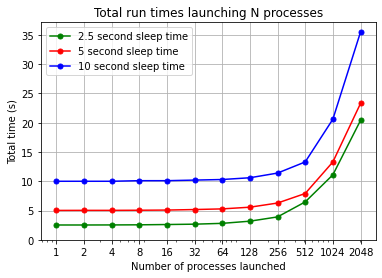

In [42]:
figure(1)
clf()


# Convert the data to Numpy arrays;  select first M entries (for visualization purposes)
M = 12
T2 = array(T_data_2)[:M]
T5 = array(T_data_5)[:M]     # don't plot all of the data
T10 = array(T_data_10)[:M]   

# Vector of number of processes
N = 2**arange(M)

semilogx(N,T2,'g.-',ms=10,label='2.5 second sleep time')
semilogx(N,T5,'r.-',ms=10,label='5 second sleep time')
semilogx(N,T10,'b.-',ms=10,label='10 second sleep time')

# Make nice tick marks
pstr = ([f'{n}' for n in N])
xticks(N,pstr)
yticks(arange(0,36,5))

xlabel('Number of processes launched')
ylabel('Total time (s)')
title('Total run times launching N processes')

legend()

grid();

In [43]:
N

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048])

We see that for each run, the timing results remain flat up until about 32 processors, where is starts to creep up.    

Below, we subtract the sleep time from the total run time to get the cost of the overhead.  This "overhead" roughly corresponds to what is called *latency* in high performance computing. 

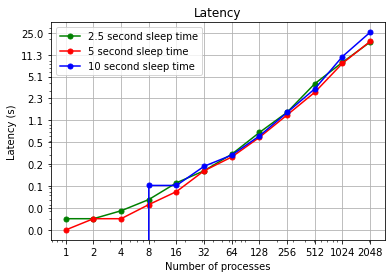

In [44]:
figure(2)
clf()

# Compute latency for each runs with sleep times 2.5s, 5s and 10s. 
L2 = T2 - 2.5
L5 = T5 - 5
L10 = T10 - 10

# Array of N values : 1,2,4,8,16,32,...,2048
N = 2**arange(len(L5))

loglog(N,L2,'g.-',ms=10,label="2.5 second sleep time")
loglog(N,L5,'r.-',ms=10,label="5 second sleep time")
loglog(N,L10,'b.-',ms=10,label="10 second sleep time")

xlabel('Number of processes')
ylabel('Latency (s)')
title('Latency')

# Make nice tick marks
pstr = ([f'{n}' for n in N])
xticks(N,pstr)

ytick = logspace(log10(0.02),log10(25),10)
pstr = ([f'{y:.1f}' for y in ytick])
yticks(ytick,pstr)


grid()

legend();

In [45]:
L10

array([ 0. ,  0. ,  0. ,  0.1,  0.1,  0.2,  0.3,  0.6,  1.4,  3.3, 10.6,
       25.5])

In [46]:
L2

array([ 0.03,  0.03,  0.04,  0.06,  0.11,  0.17,  0.31,  0.68,  1.41,
        3.97,  8.6 , 17.9 ])

From the above plot, we see that the fixed costs associated with launching $N$ jobs is roughly independent of the actual sleep time.  This suggests that these fixed costs (or *latency*) are associated with the operating system launching, starting and managing the $N$ jobs, rather than something to do with the actual "job" (our sleep timer) that we are running. 

The three latency curves in the latency plot appear to be straight lines in loglog space.  This suggests a relationship between latency $L$  and number of processes $N$
given by 

\begin{equation}
\log(L) = p \log(N) + \overline{C}
\end{equation}

for some constant $\overline{C}$.

Using our data from above, we can estimate values $p$ and $\overline{C}$ using linear regression on the log data.  

Below, we fit the data from the 10 second sleep timing to a line to get slope $p$ and constant $\overline{C}$.  

In [47]:
# compute a best-fit line. 
pC = polyfit(log(N[3:]),log(L10[3:]),1)   # Skip values where L = 0. 

p = pC[0]  # power p
Cbar = pC[1]  # Constant C
print(f"Power p is approx. {p:.2f}")
print(f"Constant C is approx. {Cbar:.2e} (s)")
print(f"alpha = {exp(Cbar)}")

Power p is approx. 1.04
Constant C is approx. -5.14e+00 (s)
alpha = 0.005853042181359094


The linear relationship between the log data can be written equivalent as

\begin{equation}
L \approx C N^p, \quad C = e^{\overline{C}}
\end{equation}

The value of $p$ is approximately 1 and so the latency is *proportional* to the number of processes launched. 

\begin{equation}
L \sim N.
\end{equation}

The constant of propotionality $C = e^{\overline{C}}$ is typically very small.

#### A performance model

Based on the above, we can create a *performance model* describing the time $T$ it takes
to run our $N$ "sleep" tasks as a function of the number of processes launched.  This model can be written as

\begin{equation}
T = T_s + \alpha N
\end{equation}

where $T_s$ is the sleep time, and $\alpha$ is the latency parameter that will vary from system to system.  For the data above, this parameter is $\alpha = C \sim \mathcal O(10^{-3})$ ms.  

To test this model, we can compare our model values to actual values we found above.  We compare our performance model against actual timing results for $N=256$ processes.

Below, we provide three values

* **Ideal time** The time a "perfect" code (without latency) would take. For this problem, this is the sleep time. 

* **Actual time** Timing results computed using `timeit` in code cells above. 

* **Performance Model** Time predicted by our performance model. 

In [48]:
# A performance model
N0 = 256
I = 8
assert N0 == N[I], "Indices are not consistent"
alpha = exp(Cbar) 
L = alpha*N0

print(f"Performance model for launching {N0} processes\n")

print("{:>8s} {:>12s} {:>12s}".format("Ideal time","Actual time", "Perf. Model"))
print("{:s}".format('-'*38))

fstr = "{:8.2f} {:12.2f} {:12.2f}".format
print(fstr(2.5, T2[I], 2.5 + L))   # index 7 corresponds to N=128
print(fstr(5,T5[I], 5+L))
print(fstr(10,T10[I],10+L))

Performance model for launching 256 processes

Ideal time  Actual time  Perf. Model
--------------------------------------
    2.50         3.91         4.00
    5.00         6.28         6.50
   10.00        11.40        11.50


The estimated value from the latency model is only slightly larger than the actual timing. 

### Weak scaling

<hr style="border-width:4px; border-color:black"></hr>

In the above example, each process had the same amount of work to do, regardless of how many processes we launch.  The first timing plot is an example of a "weak scaling" plot.  

* *Weak scaling*  The work per processor is held fixed while increasing the number of processes. 

An ideal weak scaling plot would be a horizontal line.  We can qualitatively describe the weak scaling of a system by observing how far the actual curve deviates from  this ideal. 

### Efficiency

<hr style="border-width:4px; border-color:black"></hr>
 

A related concept is the *efficiency* of a simulation and addresses the question as to how efficiently jobs a are able to use the computational resources available.  Efficiency on $N$ processors is measured as 

\begin{equation}
E = \frac{\mbox{Ideal time}}{\mbox{Actual time}}
\end{equation}

A simulation with perfect weak scaling will be 100\% efficient.  A job in which overhead (or latency) begins to dominate will have lower efficiency.  

Below, we show an efficiency plots for each of the three sleep simulations.

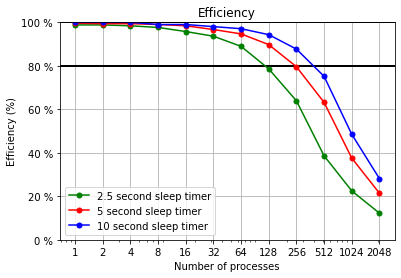

In [49]:
figure(3)
clf()

axhline(y=100,linewidth=2,color='black')
axhline(y=80,linewidth=2,color='black')


semilogx(N,2.5/T2*100,'g.-',ms=10,label="2.5 second sleep timer")
semilogx(N,5/T5*100,'r.-',ms=10,label="5 second sleep timer")
semilogx(N,10/T10*100,'b.-',ms=10,label="10 second sleep timer")

# Ts = 10
# semilogx(N,(1 - alpha/Ts*N)*100,'k:',linewidth=2,label="Predicted (10s timer)")


xlabel('Number of processes')
ylabel('Efficiency (%)')
title('Efficiency')

# Make nice tick marks
pstr = ([f'{n}' for n in N])
xticks(N,pstr)

ytick = linspace(0,100,6)
pstr = (['{:.0f} %'.format(y) for y in ytick])
yticks(ytick,pstr)

ylim([0,100])


legend()

grid();

Efficiency drops off as the number of processes is increased.  Here, we see good efficiency (e.g. over 80%) up to about 128 processes for the 5 second sleep job and past 256 processes for the 10 second sleep job.  As is typical behavior for multiple jobs, efficiency drops off with number of processes and longer jobs remain more efficient for larger number of processes, since they are better able to amortize the latency costs.

The reason the effiency drops off is evident in our performance model.  Assuming that $\alpha N \ll 1$, we can approximate the efficiency $E$ using a Taylor series expansion to get 

\begin{equation}
E = \frac{T_s}{T_s + \alpha N} = \frac{1}{1 + \alpha\frac{N}{T_s}} \approx 
1 - \frac{\alpha N}{T_s} < 1
\end{equation}

This also shows why larger $T_s$ (our sleep time) will lead to better efficiency, for a fixed $N$.  

For larger $N$, we will have $\alpha N \gg 1$ and we can approximate the efficiency model as 

\begin{equation}
E = \frac{T_s}{T_s + \alpha N} \sim \frac{T_s}{\alpha N} \rightarrow 0. 
\end{equation}

As $N$ increases, the latency dominates the simulation time, and efficiency goes to zero. 

The predicted efficiency, and the two different regimes, depending on the size of $\alpha N$ aer shown below. 

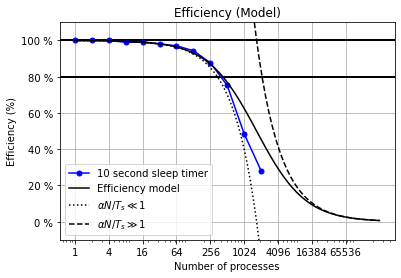

In [50]:
figure(4)
clf()

axhline(y=100,linewidth=2,color='black')
axhline(y=80,linewidth=2,color='black')

N = 2**arange(len(T10))
semilogx(N,10/T10*100,'b.-',ms=10,label="10 second sleep timer")

def Eff(N,Ts,alpha):
    return 100/(1 + alpha*N/Ts)


Ts = 10

Ns = logspace(0,log10(2**18),100)
semilogx(Ns,Eff(Ns,Ts,alpha),'k-',lw=1.5,label="Efficiency model")

semilogx(Ns,(1 - alpha*Ns/Ts)*100,'k:',linewidth=1.5,label=r"$\alpha N/T_s \ll 1$")
semilogx(Ns,100*Ts/(alpha*Ns),'k--',linewidth=1.5,label=r"$\alpha N/T_s \gg 1$")

xlabel('Number of processes')
ylabel('Efficiency (%)')
title('Efficiency (Model)')

# Make nice tick marks
Nv = 2**arange(18)
pstr = ([f'{n}' for n in Nv[::2]])
xticks(Nv[::2],pstr)

ytick = linspace(0,100,6)
pstr = (['{:.0f} %'.format(y) for y in ytick])
yticks(ytick,pstr)

ylim([-10,110])


legend()

grid();

<hr style="border-width:4px; border-color:coral"></hr>

## Links

<hr style="border-width:4px; border-color:coral"></hr>

Here is link that goes into more detail on the Multiprocessing module. 

[SuperfastPthon](https://superfastpython.com/multiprocessing-in-python/)